📥 Fetching stock data for AAPL from 2023-01-01 to 2023-12-31...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


✅ Loaded 250 rows.
📊 Calculating technical indicators...
📈 Plotting indicators...


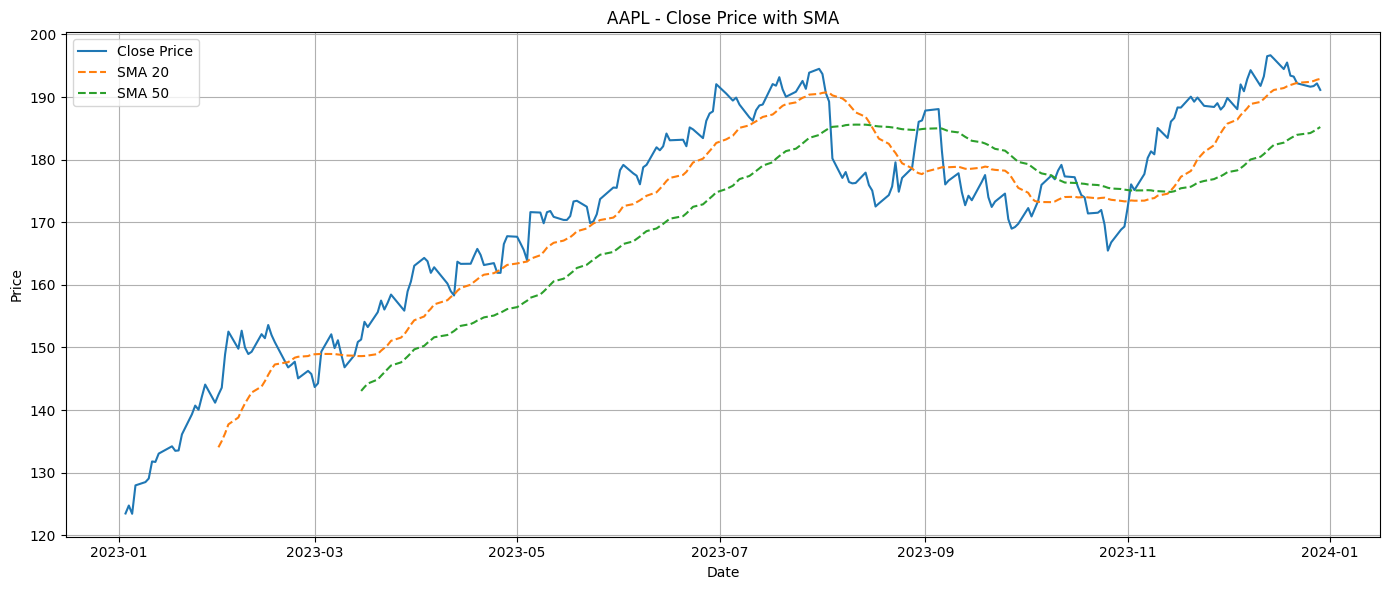

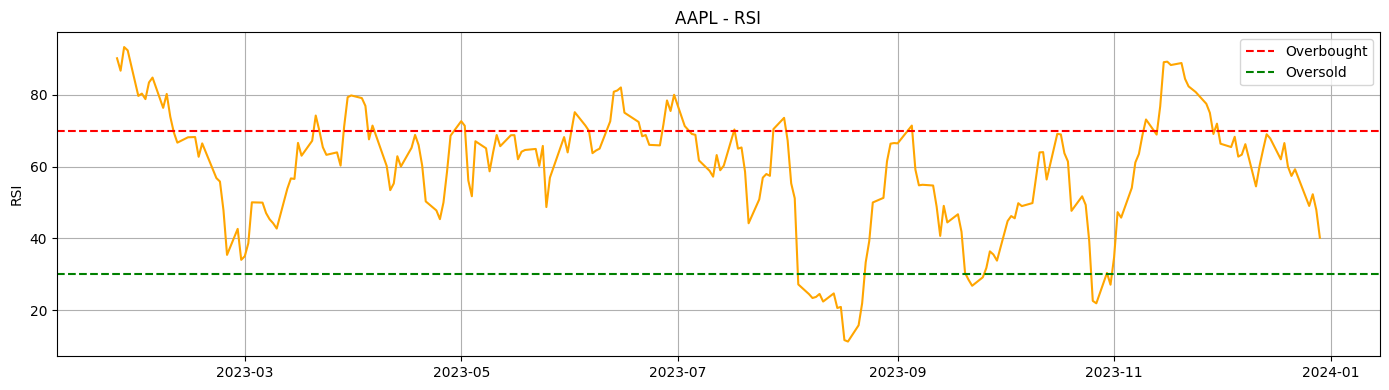

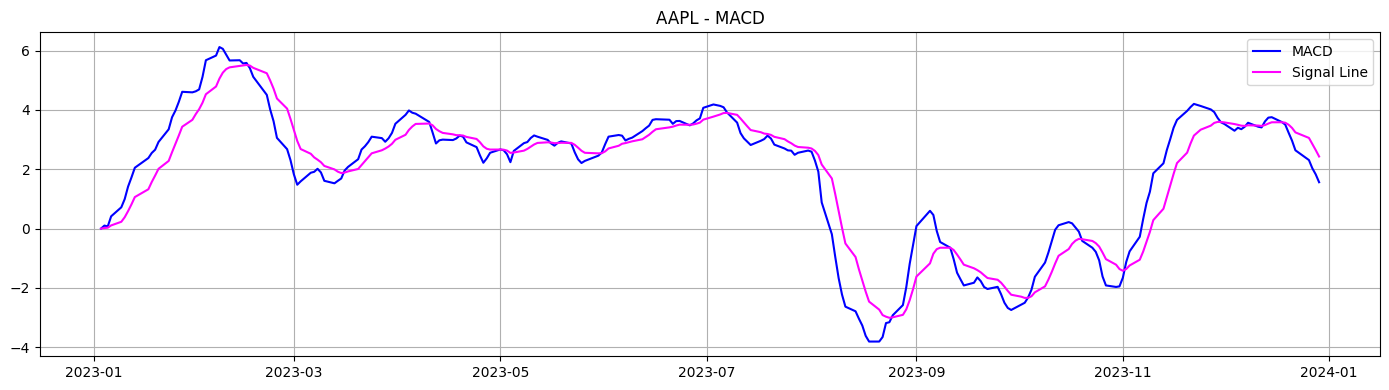


📌 Summary Stats:
Price        Close      SMA_20      SMA_50         RSI        MACD      Signal
Ticker        AAPL                                                            
count   201.000000  201.000000  201.000000  201.000000  201.000000  201.000000
mean    177.693559  175.578665  172.444663   58.090905    1.525712    1.515525
std      10.899156   11.238035   11.965551   16.324356    2.312776    2.167292
min     151.264175  148.609962  143.046223   11.303803   -3.805263   -3.004812
25%     170.859314  170.049513  164.413819   49.793294   -0.451045   -0.692173
50%     177.077057  176.582999  176.129838   62.759134    2.638685    2.664074
75%     188.052872  184.439340  182.143527   68.767208    3.226132    3.201941
max     196.669785  192.895900  185.589228   89.179307    4.201914    3.898344


In [12]:
# ---------------------- Task 2: Financial Indicator Analysis ----------------------
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# ------------------------ Configuration ------------------------
symbol = "AAPL"
start_date = "2023-01-01"
end_date = "2023-12-31"

# ------------------------ Load Data ------------------------
def load_stock_data(symbol, start, end):
    print(f"📥 Fetching stock data for {symbol} from {start} to {end}...")
    df = yf.download(symbol, start=start, end=end)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    print(f"✅ Loaded {len(df)} rows.")
    return df

# ------------------------ Technical Indicators ------------------------
def compute_indicators(df):
    print("📊 Calculating technical indicators...")
    
    # SMA and EMA
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

    # RSI
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    return df

# ------------------------ Visualizations ------------------------
def plot_indicators(df, symbol):
    print("📈 Plotting indicators...")

    # Price with Moving Averages
    plt.figure(figsize=(14, 6))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(df['SMA_20'], label='SMA 20', linestyle='--')
    plt.plot(df['SMA_50'], label='SMA 50', linestyle='--')
    plt.title(f'{symbol} - Close Price with SMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # RSI
    plt.figure(figsize=(14, 4))
    plt.plot(df['RSI'], color='orange')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='green', linestyle='--', label='Oversold')
    plt.title(f'{symbol} - RSI')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # MACD
    plt.figure(figsize=(14, 4))
    plt.plot(df['MACD'], label='MACD', color='blue')
    plt.plot(df['Signal'], label='Signal Line', color='magenta')
    plt.title(f'{symbol} - MACD')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# ------------------------ Run Analysis ------------------------
def run_financial_analysis(symbol, start_date, end_date):
    df = load_stock_data(symbol, start_date, end_date)
    df = compute_indicators(df)
    plot_indicators(df, symbol)

    print("\n📌 Summary Stats:")
    print(df[['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD', 'Signal']].dropna().describe())

    return df

# ------------------------ Run Here ------------------------
if __name__ == "__main__":
    run_financial_analysis(symbol, start_date, end_date)


In [11]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------------- -------------------------- 1.0/3.0 MB 2.3 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.0 MB 2.9 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.0 MB 2.9 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.0 MB 2.9 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.0 MB 2.9 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.0 MB 2.9 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.0 MB 2.9 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.0 MB 2.9 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.0 MB 2.9 MB/s eta 0:00:01
     ---------

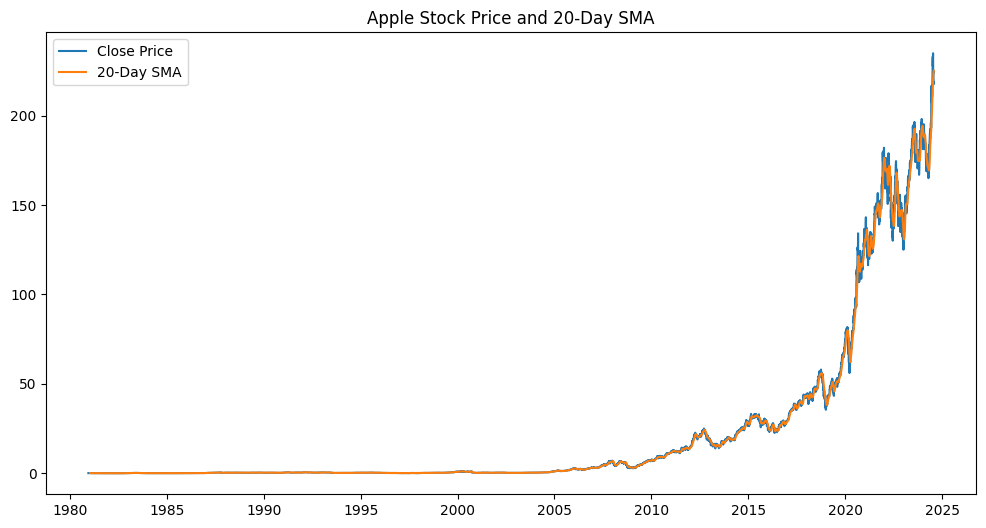

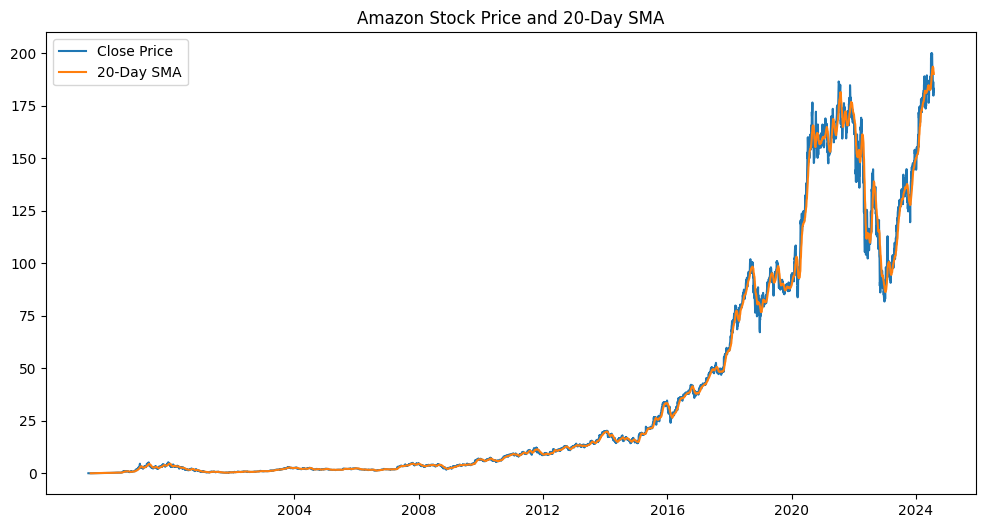

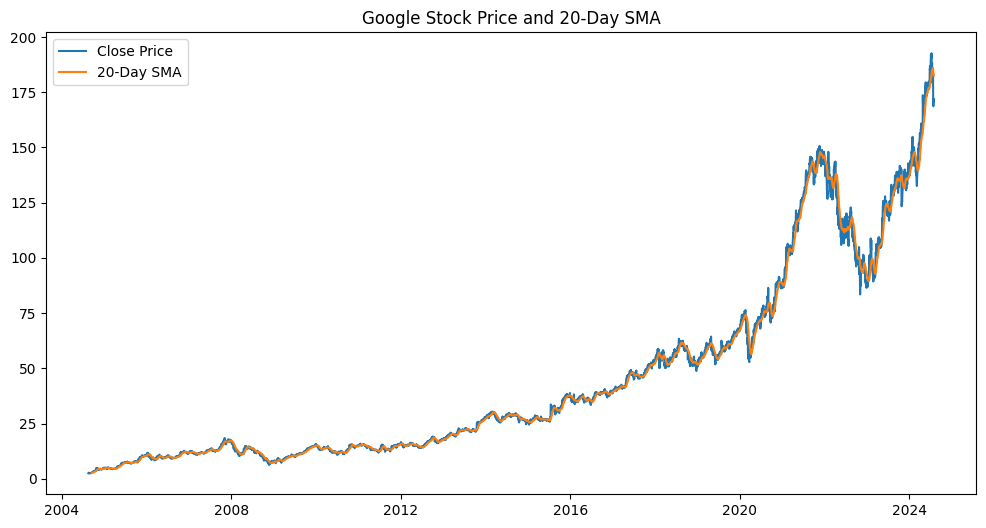

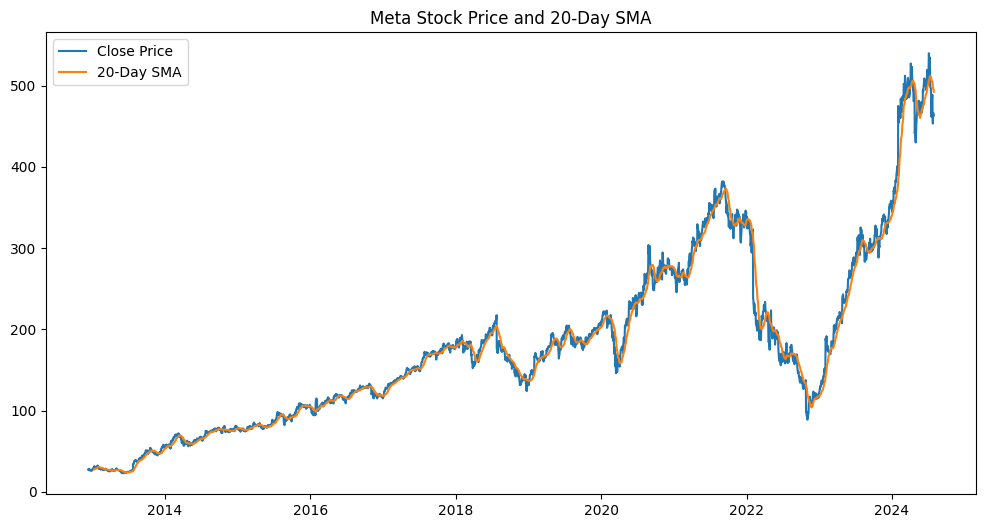

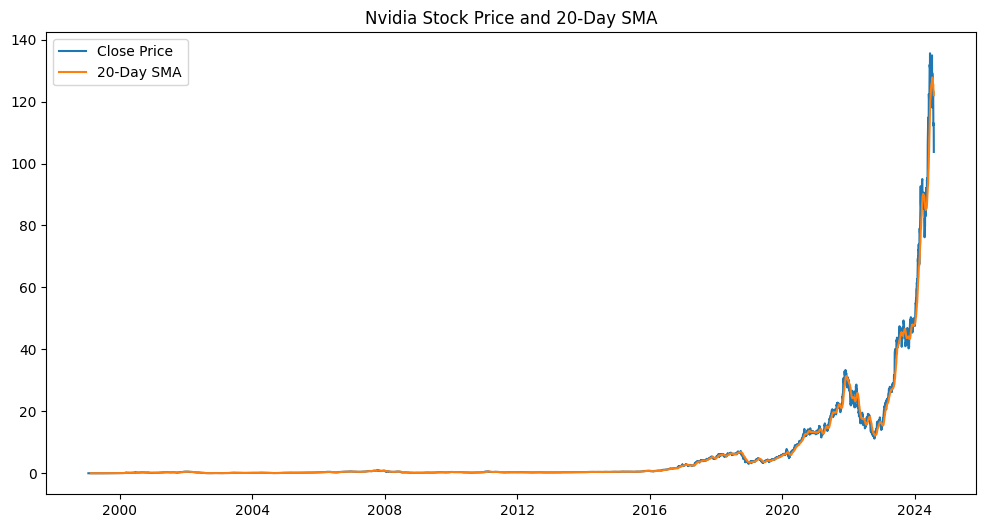

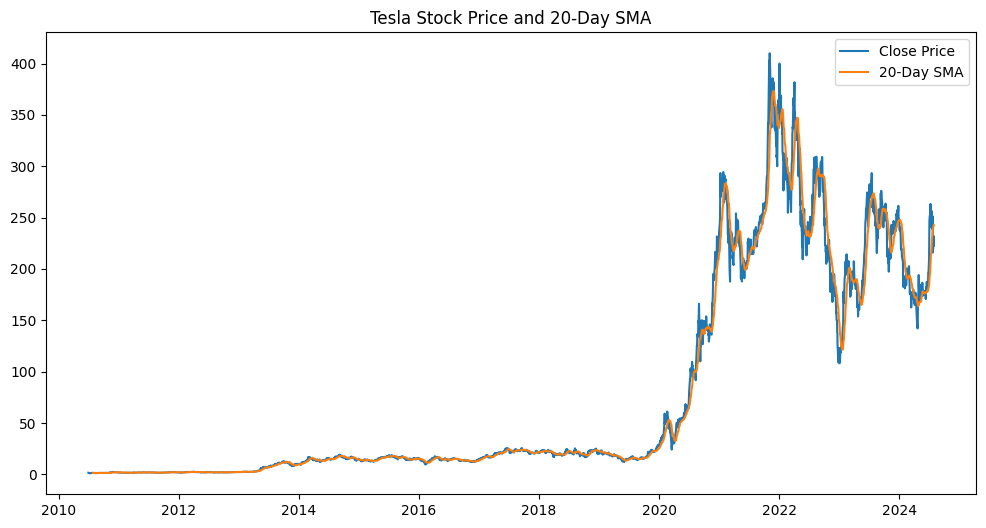

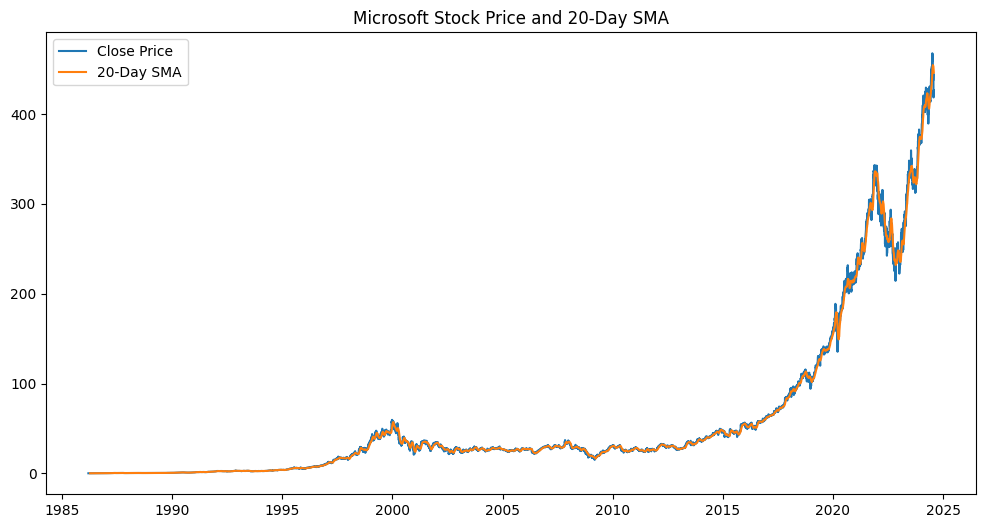

In [17]:
import pandas as pd
import pynance as pn
import matplotlib.pyplot as plt

# Load data for each company (replace filenames with your actual paths)
file_path_AAPL = r"C:\Users\HP\Downloads\yfinance_data\yfinance_data\AAPL_historical_data.csv"
file_path_AMZN= r"C:\Users\HP\Downloads\yfinance_data\yfinance_data\AMZN_historical_data.csv"
file_path_GOOG = r"C:\Users\HP\Downloads\yfinance_data\yfinance_data\GOOG_historical_data.csv"
file_path_META = r"C:\Users\HP\Downloads\yfinance_data\yfinance_data\META_historical_data.csv"
file_path_MSFT= r"C:\Users\HP\Downloads\yfinance_data\yfinance_data\MSFT_historical_data.csv"
file_path_NVDA = r"C:\Users\HP\Downloads\yfinance_data\yfinance_data\NVDA_historical_data.csv"
file_path_TSLA = r"C:\Users\HP\Downloads\yfinance_data\yfinance_data\TSLA_historical_data.csv"



files = {
    'Apple': file_path_AAPL,
    'Amazon': file_path_AMZN,
    'Google': file_path_GOOG,
    'Meta': file_path_META,
    'Nvidia': file_path_NVDA,
    'Tesla': file_path_TSLA,
    'Microsoft': file_path_MSFT 
}

data = {}
for company, file_path in files.items():
    df = pd.read_csv(file_path, parse_dates=['Date'])  # Make sure your CSV has a 'Date' column
    df.set_index('Date', inplace=True)
    data[company] = df

# Example: Calculate a simple moving average for each company
for company, df in data.items():
    df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Plot closing price and SMA for one company (Apple)
for company, df in data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(df['SMA_20'], label='20-Day SMA')
    plt.title(f'{company} Stock Price and 20-Day SMA')
    plt.legend()
    plt.show()
